

```
`# This is formatted as code`
```

# Assignment 1, "Bag, not bag"

**On the DL group details**

Sahil Shah: 20194624, sahil.shah.20@ucl.ac.uk

Akshaya Natarajan: 20069959, akshaya.natarajan.20@ucl.ac.uk

Kamiylah Charles: 20092484, kamiylah.charles.20@ucl.ac.uk

Akshay Parmar: 20153279, akshay.parmar.20@ucl.ac.uk

Chanel Sadrettin-Brown, 16050121, chanel.sadrettin-brown.20@ucl.ac.uk

3.1 A memory-efficient voted perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Take off data
dev_images = np.load("fashion-dev-imgs.npz").reshape(784, 1000)
dev_labels = np.load("fashion-dev-labels.npz")
test_images = np.load("fashion-test-imgs.npz").reshape(784, 1000)
test_labels = np.load("fashion-test-labels.npz")
train_images = np.load("fashion-train-imgs.npz").reshape(784, 12000)
train_labels = np.load("fashion-train-labels.npz")

In [ ]:
w = np.zeros(784)
mean_w = np.zeros(784)
c = 1

In [ ]:
no_epochs = 100
accuracies = []
dev_accuracies = []

for l in range(no_epochs):
    accuracy = 0
    for i in range(len(train_labels)):
        x = train_images.T[i].flatten()
        if w@x >= 0:
            pred_labels = 1
        else:
            pred_labels = 0
        if pred_labels == train_labels[i]:
            c += 1
        else:
            mean_w = np.add(mean_w, w*c)
            w = w + (train_labels[i] - pred_labels) * x
            c = 1
    
    pred_train_labels=np.zeros(len(train_labels))
    for i in range(len(train_labels)):
        if mean_w @ train_images[:,i] >= 0:
            pred_train_labels[i] = 1
        else:
            pred_train_labels[i] = 0
    train_count = sum(map(lambda x : x==0.0, abs(train_labels - pred_train_labels)))
    accuracies.append(train_count/len(train_labels))
     
    pred_dev_labels=np.zeros(len(dev_labels))
    for i in range(len(dev_labels)):
        if mean_w @ dev_images[:,i] >= 0:
            pred_dev_labels[i] = 1
        else:
            pred_dev_labels[i] = 0
    dev_count = sum(map(lambda x : x==0.0, abs(dev_labels - pred_dev_labels)))
    dev_accuracies.append(dev_count/len(dev_labels))

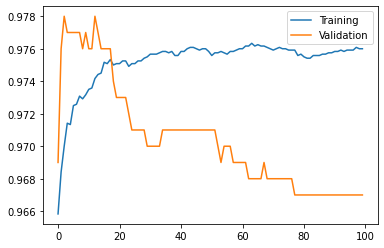

In [ ]:
plt.plot(accuracies, label="Training")
plt.plot(dev_accuracies, label="Validation")
plt.legend()
plt.show()

In [ ]:
best_epoch = np.argmax(dev_accuracies)
print('Epoch with max validation accuracy: ', best_epoch)
print('Validation accuracy at epoch', best_epoch,' =', dev_accuracies[best_epoch])
print('Training accuracy at epoch', best_epoch,' =', accuracies[best_epoch])

Epoch with max validation accuracy:  2
Validation accuracy at epoch 2  = 0.978
Training accuracy at epoch 2  = 0.97


3.2 Mean squared-loss logistic regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def logistic(x):
    "Produce the logistic function"
    return (1/(1+np.exp(-x)))

In [ ]:
def logistic_derivative(x):
    "Produce the derivative of the logistic function"
    return np.multiply(logistic(x),(1-logistic(x)))

In [ ]:
def grad_w(y, w, X, b):
    "Differentiate with respect to w"
    return (-1/y.shape[1])*np.multiply((y-logistic(w.T@X+ b)),logistic_derivative(w.T@X+b))@X.T

In [ ]:
def summed_grad_w(y, w, X, b):
    "Differentiate with respect to w"
    return (-1/y.shape[1])*np.sum(np.multiply((y-logistic(w.T@X+ b)),logistic_derivative(w.T@X+b))@X.T)

In [ ]:
def grad_b(y, w, X, b):
    "Differentiate with respect to b"
    return (-1/y.shape[1])*np.sum(np.multiply((y-logistic(w.T@X + b)),logistic_derivative(w.T@X+b)))

In [ ]:
def loss(y, w, X, b):
    "Provide mean square loss function"
    #n = np.asarray(y).reshape(1,1)
    return (1/(2*y.shape[1]))*np.sum((y-logistic(w.T@X + b))**2)

In [ ]:
def finite_difference_w(y, w, X, b, e):
    "Finite differences gradient with respect to w"
    return ((loss(y, w + 0.5*e, X, b)) - (loss(y, w - 0.5*e, X, b)))/e

In [ ]:
def finite_difference_b(y, w, X, b, e):
    "Finite differences gradient with respect to b"
    return ((loss(y, w, X, b + 0.5*e)) - (loss(y, w, X, b - 0.5*e)))/e

In [ ]:
dev_images = np.load('/content/fashion-dev-imgs.npz').reshape(784, 1000)
dev_labels = np.load('/content/fashion-dev-labels.npz').reshape(1,-1)
test_images = np.load('/content/fashion-test-imgs.npz').reshape(784, 1000)
test_labels = np.load('/content/fashion-test-labels.npz')
train_images = np.load('/content/fashion-train-imgs.npz').reshape(784, 12000)
train_labels = np.load('/content/fashion-train-labels.npz').reshape(1,-1)

In [ ]:
w = np.random.randn(784).reshape(-1, 1)
b = 0

In [ ]:
# gradient checking using finite differences for first sample
X1 = train_images[:,1000].reshape(784,1)
Y1 = train_labels[:,1000].reshape(1,1)
grad_b(Y1, w, X1, b) 

0.0009378076158856876

In [ ]:
finite_difference_b(Y1, w, X1, b, 0.01)

0.0009378114904257107

In [ ]:
if abs(grad_b(Y1, w, X1, b) - finite_difference_b(Y1, w, X1, b, 0.01)) <= 1e-7:
    print('Good bias approximation') 

Good bias approximation


In [ ]:
summed_grad_w(Y1, w, X1, b)

0.11449496391839173

In [ ]:
finite_difference_w(Y1, w, X1, b, 0.000001)

0.11449496389870362

In [ ]:
if abs(summed_grad_w(Y1, w, X1, b) - finite_difference_w(Y1, w, X1, b, 0.000001)) <= 1e-7:
    print('Good weight approximation')

Good weight approximation


In [ ]:
# gradient checking using finite differences for second sample
X2 = train_images[:,2].reshape(784,1)
Y2 = train_labels[:,2].reshape(1,1)
grad_b(Y2, w, X2, b) 

-0.0008555373479266501

In [ ]:
finite_difference_b(Y2, w, X2, b, 0.01)

-0.0008555500568905379

In [ ]:
if abs(grad_b(Y2, w, X2, b) - finite_difference_b(Y2, w, X2, b, 0.01)) <= 1e-7:
    print('Good bias approximation')

Good bias approximation


In [ ]:
summed_grad_w(Y2, w, X2, b) 

-0.1940856131384656

In [ ]:
finite_difference_w(Y2, w, X2, b, 0.000001)

-0.19408561462630133

In [ ]:
if abs(summed_grad_w(Y2, w, X2, b) - finite_difference_w(Y2, w, X2, b, 0.000001)) <= 1e-7:
    print('Good weight approximation')

Good weight approximation


In [ ]:
epoch_no = 1000
learning_rate = 0.1
training_losses = []
training_accuracies = []
validation_losses = []
validation_accuracies = []
w = np.zeros(784).reshape(-1, 1)
b = 0

for l in range(epoch_no):
    accuracy = 0
    train_loss = 0
    
    prev_b = b
    b = b - learning_rate*grad_b(train_labels, w, train_images, b)
    
    prev_w = w
    w = w - learning_rate*grad_w(train_labels, w, train_images, prev_b).T

    t_count = np.sum((train_labels == ((logistic(w.T@train_images + b) >= 0.5)*1.0))*1.0) 
    v_count = np.sum((dev_labels == ((logistic(w.T@dev_images + b) >= 0.5)*1.0))*1.0) 
    
    epoch_loss = loss(train_labels, w, train_images, b) 
    training_losses.append(epoch_loss)
    training_accuracies.append(t_count/train_labels.shape[1])
    validation_losses.append(loss(dev_labels, w, dev_images, b))
    validation_accuracies.append(v_count/dev_labels.shape[1])

In [ ]:
best_epoch = np.argmax(validation_accuracies)
print('Epoch with max validation accuracy: ', best_epoch)
print('Validation accuracy at epoch', best_epoch,'=', validation_accuracies[best_epoch])
print('Training accuracy at epoch', best_epoch,'=', round(training_accuracies[best_epoch],5))

Epoch with max validation accuracy:  896
Validation accuracy at epoch 896 = 0.967
Training accuracy at epoch 896 = 0.96017


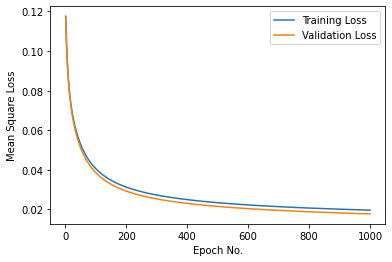

In [ ]:
plt.plot(range(1,epoch_no+1), training_losses, label='Training Loss')
plt.plot(range(1,epoch_no+1), validation_losses, label = 'Validation Loss')
plt.ylabel("Mean Square Loss")
plt.xlabel("Epoch No.")
plt.legend()
plt.show()

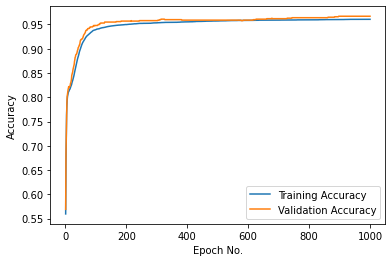

In [ ]:
plt.plot(range(1,epoch_no+1), training_accuracies, label='Training Accuracy')
plt.plot(range(1,epoch_no+1), validation_accuracies, label='Validation Accuracy')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epoch No.")
plt.show()

3.3 Three-layer multi-layer perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#extract data from dataset
x_train = np.load('/content/fashion-train-imgs.npz')
y_train = np.load('/content/fashion-train-labels.npz')

x_test = np.load('/content/fashion-test-imgs.npz')
y_test = np.load('/content/fashion-test-labels.npz')

x_val = np.load('/content/fashion-dev-imgs.npz')
y_val = np.load('/content/fashion-dev-labels.npz')

(28, 28)


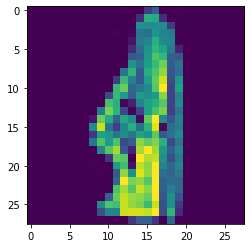

In [ ]:
# viewing a sample
sample = 1

image = x_train[:,:,sample]
print(image.shape)

fig = plt.figure
plt.imshow(image)
plt.show()

In [ ]:
# Reshaping and checking dimensions

X_train = x_train.reshape(x_train.shape[0] * x_train.shape[1], x_train.shape[2]) 
print('X_train = ', X_train.shape)

assert X_train.shape == (784,12000)

Y_train = y_train.reshape(1, y_train.shape[0])
print('Y_train = ', Y_train.shape)

assert Y_train.shape == (1,12000)

X_val = x_val.reshape(x_val.shape[0]*x_val.shape[1],x_val.shape[2])
print('X_val = ', X_val.shape)

assert X_val.shape == (784,1000)

Y_val = y_val.reshape(1, y_val.shape[0])
print('Y_val = ', Y_val.shape)

assert Y_val.shape == (1,1000)

X_test = x_test.reshape(x_test.shape[0]*x_test.shape[1],x_test.shape[2])
print('X_test = ', X_test.shape)

assert X_test.shape == (784,1000)

Y_test = y_test.reshape(1, y_test.shape[0])
print('Y_test = ', Y_test.shape)

assert Y_test.shape == (1,1000)

X_train =  (784, 12000)
Y_train =  (1, 12000)
X_val =  (784, 1000)
Y_val =  (1, 1000)
X_test =  (784, 1000)
Y_test =  (1, 1000)


In [ ]:
# defining the sigmoid activation function and it's derivative
def sigmoid_gradient(z):
    sigp = sigmoid(z) * (1-sigmoid(z))
    return sigp

def sigmoid(z):
    sig = 1/ (1 + np.exp(-z))
    return sig

In [ ]:
# set up random weights and zero biases to initialize before optimization on training set
def initial_parameters(input_size, h1, h2, output_size):
    
    W3 = np.random.randn(output_size,h2)
    W2 = np.random.randn(h2,h1)
    W1 = np.random.randn(h1,input_size)

    b3 = np.zeros((output_size,1))
    b2 = np.zeros((h2,1))
    b1 = np.zeros((h1,1))
    
    parameters = (W1, b1 , W2 , b2 , W3 ,b3)
    
    return parameters 

In [ ]:
# loss function 
def log_like(y_true, y_pred):
    log_l = np.multiply(-np.log(y_pred),y_true) + np.multiply(-np.log(1 - y_pred), 1 - y_true)
    return log_l

In [ ]:
# calculating accuracy
def accuracy(y_true, y_pred):
    sim = 0
    y_pred = np.array(y_pred).reshape(1,len(y_pred))
    for k in range(y_true.shape[1]):
        if y_true[0][k] == y_pred[0][k]:
            sim += 1

    return (sim/y_true.shape[1])

# mapping y_pred < 0.5 to 0 and else 1        
def threshold_func(y_pred):
    y_pred_mapped =[]
    for l in range(y_pred.shape[1]):
        if y_pred[0][l] >= 0.5:
            y_pred_mapped.append(1)
        else:
            y_pred_mapped.append(0)
    return y_pred_mapped

In [ ]:
# finite difference helper functions for gradient_check_n from Andrew Ng Deep Learning Specialization course - Coursera
def dictionary_to_vector(parameters):
    keys = []
    count = 0
    W1, b1 , W2 , b2 , W3 , b3 = parameters
    params = {}
    params['W1'] = W1
    params['b1'] = b1
    params['W2'] = W2
    params['b2'] = b2
    params['W3'] = W3
    params['b3'] = b3
    
    for key in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        
        # flatten parameter
        new_vector = np.reshape(params[key], (-1,1))
        keys = keys + [key]*new_vector.shape[0]
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta, keys

def vector_to_dictionary(theta):
    
    W1 = theta[:7840].reshape((10,784))
    b1 = theta[7840:7850].reshape((10,1))
    W2 = theta[7850:7950].reshape((10,10))
    b2 = theta[7950:7960].reshape((10,1))
    W3 = theta[7960:7970].reshape((1,10))
    b3 = theta[7970:7971].reshape((1,1))
    
    parameters = (W1, b1 , W2 , b2 , W3 ,b3)

    return parameters

def gradients_to_vector(gradients):
    count = 0
    dZ3, dW3, db3, dA2, dZ2, dW2, db2, dA1, dZ1, dW1, db1 = gradients

    grads = {}

    grads['dW1'] = dW1
    grads['db1'] = db1
    grads['dW2'] = dW2
    grads['db2'] = db2
    grads['dW3'] = dW3
    grads['db3'] = db3

    for key in ['dW1', 'db1', 'dW2', 'db2', 'dW3', 'db3']:
        # flatten parameter
        new_vector = np.reshape(grads[key], (-1,1))
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta

In [ ]:
# function to calculate forward propogation
def forward_prop(X, parameters):
    
    m = X.shape[1]
    W1, b1 , W2 , b2 , W3 , b3 = parameters

    Z1 = W1 @ X + b1
    A1 = sigmoid(Z1)
    Z2 = W2 @ A1 + b2
    A2 = sigmoid(Z2)
    Z3 = W3 @ A2 + b3
    A3 = sigmoid(Z3)

    forward_pass = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, forward_pass

In [ ]:
#function to calculate back propogation
def back_prop(X, Y, forward_pass):
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = forward_pass

    dZ3 = (A3 - Y)
    dW3 = ((dZ3@A2.T))/m
    db3 = (np.sum(dZ3,axis=1,keepdims=True))/m
   
    dA2 = W3.T@dZ3
    
    dZ2=  ((dA2) * sigmoid_gradient(Z2))
    dW2 = ((dZ2@A1.T))/m
    db2 = (np.sum(dZ2,axis=1,keepdims=True))/m
    
    dA1 = W2.T@dZ2
    
    dZ1 = ((dA1) * sigmoid_gradient(Z1))
    dW1 = ((dZ1@X.T))/m
    db1 = (np.sum(dZ1,axis=1,keepdims=True))/m

    gradients = (dZ3, dW3, db3, dA2, dZ2, dW2, db2, dA1, dZ1, dW1, db1)
    
    return gradients

In [ ]:
# function performing full batch gradient descent
def gradient_descent(parameters, gradients, learning_rate):
    
    # information from forward and backprop
    
    dZ3, dW3, db3, dA2, dZ2, dW2, db2, dA1, dZ1, dW1, db1 = gradients
    W1, b1 , W2 , b2 , W3 ,b3 = parameters

    # updating weights and biases
    W3 -= learning_rate * dW3
    W2 -= learning_rate * dW2
    W1 -= learning_rate * dW1

    b3 -= learning_rate * db3
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2
      
    parameters = ( W1, b1 , W2 , b2 , W3 ,b3 )

    
    return parameters

In [ ]:
# main function for training the model
def training_model(X, Y, h1, h2, epochs,learning_rate):
    m = X.shape[1]
    cost_stored = []
    accuracies = []
    best_val_accuracy = np.zeros((epochs,2))
    
    # initialization of weights, biases
    parameters = initial_parameters(X.shape[0], h1, h2, Y.shape[0])
    
    for i in range(epochs):
        
        # forward propogation
        y_pred, forward_pass = forward_prop(X, parameters)
    
        # calculating loss using log likelihood loss function
        log_l = log_like(Y, y_pred)
        cost = 1./m * np.sum(log_l)
        cost_stored.append(cost)
               
        # training accuracy per epoch
        accuracies.append(accuracy(Y, threshold_func(y_pred)))
        best_val_accuracy[i][1] = accuracy(Y, threshold_func(y_pred))

        # back propogation
        gradients = back_prop(X, Y, forward_pass)
        
        # gradient descent
        parameters = gradient_descent(parameters, gradients, learning_rate)
        
        # validation accuracy per epoch
        y_pred_val, forward_pass = forward_prop(X_val, parameters)
        y_pred_mapped_val = threshold_func(y_pred_val)
        best_val_accuracy[i][0] = accuracy(Y_val, y_pred_mapped_val)
        
        if i % 10 == 0:
            print('Epoch ',i,' - Cost: ', round(cost,5), ' - Accuracy: ', round(accuracies[i],5))
            
            
    # final accuracy
    y_hat = threshold_func(y_pred)
    print('Final Accuracy is : ', accuracy(Y,y_hat))
    
    return y_hat, accuracies, cost_stored , best_val_accuracy      

In [ ]:
y_hat, accuracies, cost_stored, best_val_accuracy = training_model(X_train, Y_train, 300, 300, 1000, 0.1)

Epoch  0  - Cost:  2.9211  - Accuracy:  0.399
Epoch  10  - Cost:  1.18308  - Accuracy:  0.69192
Epoch  20  - Cost:  0.8365  - Accuracy:  0.77
Epoch  30  - Cost:  0.66966  - Accuracy:  0.81017
Epoch  40  - Cost:  0.56971  - Accuracy:  0.83292
Epoch  50  - Cost:  0.504  - Accuracy:  0.85242
Epoch  60  - Cost:  0.45756  - Accuracy:  0.86692
Epoch  70  - Cost:  0.42272  - Accuracy:  0.87792
Epoch  80  - Cost:  0.39536  - Accuracy:  0.88442
Epoch  90  - Cost:  0.37312  - Accuracy:  0.88925
Epoch  100  - Cost:  0.35457  - Accuracy:  0.89417
Epoch  110  - Cost:  0.33876  - Accuracy:  0.89817
Epoch  120  - Cost:  0.32505  - Accuracy:  0.9015
Epoch  130  - Cost:  0.31301  - Accuracy:  0.90533
Epoch  140  - Cost:  0.3023  - Accuracy:  0.9095
Epoch  150  - Cost:  0.29268  - Accuracy:  0.91167
Epoch  160  - Cost:  0.28397  - Accuracy:  0.91458
Epoch  170  - Cost:  0.27603  - Accuracy:  0.91708
Epoch  180  - Cost:  0.26875  - Accuracy:  0.919
Epoch  190  - Cost:  0.26205  - Accuracy:  0.92067
Epoch

In [ ]:
#best epoch
best_idx, _ = np.argmax(best_val_accuracy, axis=0)
print('Epoch with best validation accuracy: ', best_idx)
print('Training accuracy: ',best_val_accuracy[best_idx][1])
print('Validation accuracy: ',best_val_accuracy[best_idx][0])

Epoch with best validation accuracy:  630
Training accuracy:  0.9540833333333333
Validation accuracy:  0.941


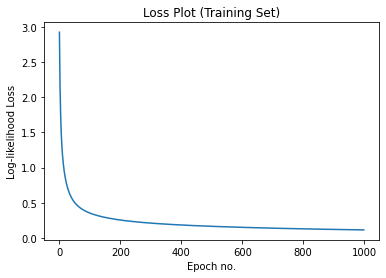

In [ ]:
plt.plot(list(range(len(cost_stored))),cost_stored) # plot against number of epochs
plt.title("Loss Plot (Training Set)")
plt.ylabel("Log-likelihood Loss")
plt.xlabel("Epoch no.")
plt.show()

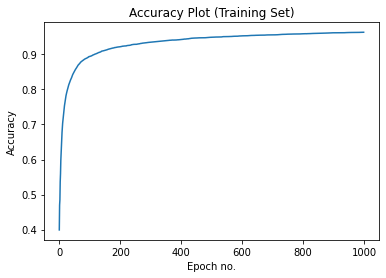

In [ ]:
plt.plot(list(range(len(accuracies))),accuracies)
plt.title("Accuracy Plot (Training Set)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch no.")
plt.show()

In [ ]:
def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
   
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        thetaplus = np.copy(parameters_values)
        thetaplus[i][0] =   thetaplus[i][0] +  epsilon
        y_pred_p , _ =  forward_prop(X, vector_to_dictionary(thetaplus))
        log_l = log_like(Y, y_pred_p)
        J_plus[i] = 1./1 * np.sum(log_l)
        
        thetaminus = np.copy(parameters_values)
        thetaminus[i][0] = thetaminus[i][0] -  epsilon
        y_pred_m, _ = forward_prop(X, vector_to_dictionary(thetaminus))
        log_l = log_like(Y, y_pred_m)
        J_minus[i] = 1./1 * np.sum(log_l)
        
        gradapprox[i] = (J_plus[i] - J_minus[i])/(2* epsilon)
        
    

    numerator = np.linalg.norm(gradapprox - grad)
    denominator = np.linalg.norm(gradapprox ) + np.linalg.norm( grad)
    difference =  numerator/denominator

    if difference >= 1e-7:
        print("Backward propagation doesn't work = " + str(difference))
    else:
        print ("Backward propagation works prerfectly = " + str(difference))
    
    return difference

In [ ]:
X1 = X_train[:,2]
X1 = X1.reshape(784,1)
Y1 = Y_train[:,2]
Y1 = Y1.reshape(1,1)

parameters = initial_parameters(X1.shape[0],10,10,Y1.shape[0])

_, forward_pass = forward_prop(X1, parameters)
gradients = back_prop(X1, Y1, forward_pass)
difference = gradient_check_n(parameters, gradients, X1, Y1)

Backward propagation works prerfectly = 2.4478192060508723e-08


In [ ]:
X2 = X_train[:,1]
X2 = X2.reshape(784,1)
Y2 = Y_train[:,1]
Y2 = Y2.reshape(1,1)

_, forward_pass = forward_prop(X2, parameters)
gradients = back_prop(X2, Y2, forward_pass)
difference = gradient_check_n(parameters, gradients, X2, Y2)

Backward propagation works prerfectly = 2.4922508808167634e-08


In [ ]:
X3 = X_train[:,1000]
X3 = X3.reshape(784,1)
Y3 = Y_train[:,1]
Y3 = Y3.reshape(1,1)

_, forward_pass = forward_prop(X3, parameters)
gradients = back_prop(X3, Y3, forward_pass)
difference = gradient_check_n(parameters, gradients, X3, Y3)

Backward propagation works prerfectly = 2.7988767565142717e-08


3.4 Hyperparameter tuning

In [ ]:
x_train = np.load('fashion-train-imgs.npz')
y_train = np.load('fashion-train-labels.npz')

x_test = np.load('fashion-test-imgs.npz')
y_test = np.load('fashion-test-labels.npz')

x_val = np.load('fashion-dev-imgs.npz')
y_val = np.load('fashion-dev-labels.npz')

# Reshaping and checking dimensions

X_train = x_train.reshape(x_train.shape[0] * x_train.shape[1], x_train.shape[2]) 
assert X_train.shape == (784,12000)

Y_train = y_train.reshape(1, y_train.shape[0])
assert Y_train.shape == (1,12000)

X_test = x_test.reshape(x_test.shape[0]*x_test.shape[1],x_test.shape[2])
assert X_test.shape == (784,1000)

Y_test = y_test.reshape(1, y_test.shape[0])
assert Y_test.shape == (1,1000)

X_val = x_val.reshape(x_val.shape[0]*x_val.shape[1],x_val.shape[2])
assert X_val.shape == (784,1000)

Y_val = y_val.reshape(1, y_val.shape[0])
assert Y_val.shape == (1,1000)

In [ ]:
# logistic sigmoid function

def sigmoid(z):
    sig = 1/(1+np.exp(-z))
  
    return sig

# derivative of the logistic sigmoid function

def sig_prime(z):
    sig_dev = sigmoid(z) * (1-sigmoid(z))

    return sig_dev

# set up random weights and zero biases to initialize before optimization on training set

def initial_parameters(input_size, h1, output_size):
    
    W2 = np.random.randn(output_size,h1)
    W1 = np.random.randn(h1,input_size)
    
    b2 = np.zeros((output_size,1))
    b1 = np.zeros((h1,1))
    
    parameters = (W2, b2, W1, b1)
    return parameters


def forward_prop(X, parameters):
    
    W2, b2, W1, b1 = parameters
    # forward propagation steps to calculate output, the values of y that the model predicts (A3)

    Z1 = W1@X + b1
    A1 = sigmoid(Z1)
    Z2 = W2@A1 + b2
    A2 = sigmoid(Z2)

    y_pred = A2
    forward_pass = (Z2, Z1, A2, A1)
    
    return y_pred, forward_pass


# define cost function that needs to be minimized, log likelihood

def cost_loss(y_pred, y_true, parameters):
    
    m_samples = y_true.shape[1]  # total number of samples in set being tested
    loss_func = (y_true * np.log(y_pred)) + ((1-y_true) * np.log(1 - y_pred)) # could be an issue with shape of this
    cost_func = -(1/m_samples) * np.sum(loss_func)  # could be an issue with shape of this
    cost = np.squeeze(cost_func) # to get right dim
    
    return cost

# implementation of backpropagation

def back_prop(parameters, forward_pass, X, Y):
    
    m = X.shape[1]
    Z2, Z1, A2, A1 = forward_pass
    W2, b2, W1, b1 = parameters
    y_pred = A2    

    dZ2 = (y_pred - Y)
    dW2 = ((dZ2@A1.T))/m
    db2 = (np.sum(dZ2,axis=1,keepdims=True))/m

    dZ1 = ((W2.T@dZ2) * sig_prime(Z1))
    dW1 = ((dZ1@X.T))/m
    db1 = (np.sum(dZ1,axis=1,keepdims=True))/m
    
    gradients = (dW2, db2, dW1, db1)
    
    return gradients

def gradient_descent(parameters, gradients, learning_rate):
    
    # information from forward and backprop
    dW2, db2, dW1, db1 = gradients
    W2, b2, W1, b1 = parameters

    # updating weights and biases
    W2 -= learning_rate * dW2
    W1 -= learning_rate * dW1

    b1 -= learning_rate * db1
    b2 -= learning_rate * db2
    
    parameters = (W2, b2, W1, b1)
    
    return parameters

def accuracy(y_true, y_pred):
    sim = 0
#     y_pred = y_pred.reshape(1,len(y_pred))
#     y_true = y_true.reshape(1,len(y_pred))
    for k in range(y_true.shape[1]):
        if y_true[0][k] == y_pred[0][k]:
            sim += 1

    return (sim/y_true.shape[1])

def threshold_func(y_pred):
    y_pred_mapped = []
    for l in range(y_pred.shape[1]):
        if y_pred[0][l] >= 0.5:
            y_pred_mapped.append(1)
        else:
            y_pred_mapped.append(0)
    y_pred_mapped = np.array(y_pred_mapped).reshape(1, len(y_pred_mapped))
    return y_pred_mapped


def gradient_descent_momentum(parameters, gradients, learning_rate, momentum, velocity):
    
    # information from forward and backprop
    W2, b2, W1, b1 = parameters
    vdw1, vdb1, vdw2, vdb2 = velocity
    dW2, db2, dW1, db1 = gradients
    
    
    # updating weights and biases

    vdw1 = momentum * vdw1 - learning_rate * dW1
    vdw2 = momentum * vdw2 - learning_rate * dW2
    vdb1 = momentum * vdb1 - learning_rate * db1
    vdb2 = momentum * vdb2 - learning_rate * db2
    
    W1 += vdw1
    W2 += vdw2
    b1 += vdb1
    b2 += vdb2

    parameters = (W2, b2, W1, b1)
    velocity = (vdw1, vdb1, vdw2, vdb2)
    return parameters, velocity
    
    
def initial_parameters_mom(input_size, h1, output_size):
    
    
    W2 = np.random.randn(output_size,h1)
    W1 = np.random.randn(h1,input_size)
    
    b2 = np.zeros((output_size,1))
    b1 = np.zeros((h1,1))
    
    parameters = (W2, b2, W1, b1)
    
    vdw1 = np.zeros((h1,input_size))
    vdw2 = np.zeros((output_size,h1))
    vdb1 = np.zeros((h1,1))
    vdb2 = np.zeros((output_size,1))
#     print(vdw1.shape, vdw2.shape, vdb1.shape, vdb2.shape)
    
    velocity = (vdw1, vdb1, vdw2, vdb2)
    
    return parameters, velocity

Full-batch Gradient Descent without momentum

In [ ]:
# main function for training the model
def full_batch(X, Y, h1, epochs,learning_rate):
    m = X.shape[1]
    accuracies = np.zeros((epochs,2))
    losses = np.zeros((epochs,2))
    
    # initialization of weights, biases
    parameters = initial_parameters(X.shape[0], h1, Y.shape[0])
    
    for i in range(epochs):
        
        # forward propogation
        y_pred, forward_pass = forward_prop(X, parameters)
    
        # calculating loss using log likelihood loss function
        cost = cost_loss(y_pred, Y, parameters)
        
        #training loss per epoch
        losses[i][1] = cost
               
        # training accuracy per epoch
#         accuracies.append(accuracy(Y, threshold_func(y_pred)))
        accuracies[i][1] = accuracy(Y, threshold_func(y_pred)) # 1 for training

        # back propogation
        gradients = back_prop(parameters, forward_pass, X, Y)     
        
        # gradient descent
        parameters = gradient_descent(parameters, gradients, learning_rate)
        
        # validation loss & accuracy per epoch
        y_pred_val, forward_pass = forward_prop(X_val, parameters)
        losses[i][0] = cost_loss(y_pred_val, Y_val, parameters)
        y_pred_mapped_val = threshold_func(y_pred_val)
        accuracies[i][0] = accuracy(Y_val, y_pred_mapped_val) # 0 for validation
        
        
        if i % 10 == 0:
            print('Epoch ',i,'==> Training loss: ', round(losses[i][1],4), '- Train accuracy: ', round(accuracies[i][1],4) , '- Validation loss: ', round(losses[i][0],4), '- Validation accuracy: ', round(accuracies[i][0],4))
            
            
    # final accuracy
    y_hat = threshold_func(y_pred)
    print('Final Accuracy is : ', accuracy(Y,y_hat))
    
    return y_hat, losses , accuracies, parameters

In [ ]:
y_hat, fb_losses , fb_accuracies, _ = full_batch(X_train, Y_train, 300, 200, 0.1)

Epoch  0 ==> Training loss:  8.9053 - Train accuracy:  0.5002 - Validation loss:  4.7079 - Validation accuracy:  0.488
Epoch  10 ==> Training loss:  1.1379 - Train accuracy:  0.6963 - Validation loss:  0.9664 - Validation accuracy:  0.718
Epoch  20 ==> Training loss:  0.8179 - Train accuracy:  0.7758 - Validation loss:  0.6925 - Validation accuracy:  0.783
Epoch  30 ==> Training loss:  0.6756 - Train accuracy:  0.8142 - Validation loss:  0.5682 - Validation accuracy:  0.821
Epoch  40 ==> Training loss:  0.5894 - Train accuracy:  0.8365 - Validation loss:  0.4932 - Validation accuracy:  0.85
Epoch  50 ==> Training loss:  0.5295 - Train accuracy:  0.8522 - Validation loss:  0.4418 - Validation accuracy:  0.868
Epoch  60 ==> Training loss:  0.4851 - Train accuracy:  0.8631 - Validation loss:  0.4042 - Validation accuracy:  0.874
Epoch  70 ==> Training loss:  0.4507 - Train accuracy:  0.8734 - Validation loss:  0.3752 - Validation accuracy:  0.885
Epoch  80 ==> Training loss:  0.4231 - Tra

In [ ]:
best_epoch = np.argmax(fb_accuracies[:,0],axis=0)
print('Epoch with max validation accuracy: ', best_epoch)
print('Validation accuracy at epoch', best_epoch,' =', fb_accuracies[best_epoch][0])
print('Training accuracy at epoch', best_epoch,' =', fb_accuracies[best_epoch][1])

Epoch with max validation accuracy:  194
Validation accuracy at epoch 194  = 0.932
Training accuracy at epoch 194  = 0.9203333333333333


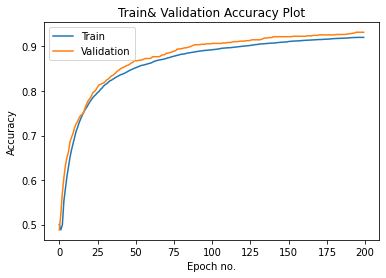

In [ ]:
train_accuracies = fb_accuracies[:,1]
plt.plot(list(range(len(train_accuracies))),train_accuracies, label='Train')
val_accuracies = fb_accuracies[:,0]
plt.plot(list(range(len(val_accuracies))),val_accuracies, label = 'Validation')
plt.title("Train& Validation Accuracy Plot")
plt.ylabel("Accuracy")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

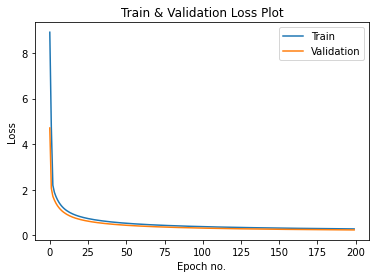

In [ ]:
train_losses = fb_losses[:,1]
plt.plot(list(range(len(train_losses))),train_losses, label='Train')
val_losses = fb_losses[:,0]
plt.plot(list(range(len(val_losses))),val_losses, label = 'Validation')
plt.title("Train & Validation Loss Plot")
plt.ylabel("Loss")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

Full-batch Gradient Descent with momentum

In [ ]:

# main function for training the model
def full_batch_momentum(X, Y, h1, epochs, learning_rate, momentum):
    
    m = X.shape[1]
    accuracies = np.zeros((epochs,2))
    losses = np.zeros((epochs,2))
    
    # initialization of weights, biases
    parameters, velocity = initial_parameters_mom(X.shape[0], h1, Y.shape[0])

    for i in range(epochs):
        # forward propogation
        y_pred, forward_pass = forward_prop(X, parameters)
    
        # calculating loss using log likelihood loss function
        cost = cost_loss(y_pred, Y, parameters)
        losses[i][1] = cost
        
               
        # training accuracy per epoch
        accuracies[i][1] = accuracy(Y, threshold_func(y_pred)) # 1 for training accuracy

        # back propogation
        gradients = back_prop(parameters, forward_pass, X, Y)     
        
        # gradient descent
        parameters, velocity = gradient_descent_momentum(parameters, gradients, learning_rate, momentum, velocity)
        
        # validation accuracy per epoch
        y_pred_val, forward_pass = forward_prop(X_val, parameters)
        losses[i][0] = cost_loss(y_pred_val, Y_val, parameters)
        y_pred_mapped_val = threshold_func(y_pred_val)
        accuracies[i][0] = accuracy(Y_val, y_pred_mapped_val) # 0 for validation accuracy
        
        if i % 10 == 0:
            print('Epoch ',i,'==> Training loss: ', round(losses[i][1],4), '- Train accuracy: ', round(accuracies[i][1],4) , '- Validation loss: ', round(losses[i][0],4), '- Validation accuracy: ', round(accuracies[i][0],4))
            
            
    # final accuracy
    y_hat = threshold_func(y_pred)
    print('Final Accuracy is : ', accuracy(Y,y_hat))
    
    return y_hat, losses , accuracies, parameters

In [ ]:
y_hat, fbm_losses , fbm_accuracies, _ = full_batch_momentum(X_train, Y_train, 300, 200, 0.1, 0.9)

Epoch  0 ==> Training loss:  3.3131 - Train accuracy:  0.3836 - Validation loss:  2.9742 - Validation accuracy:  0.37
Epoch  10 ==> Training loss:  0.6299 - Train accuracy:  0.8428 - Validation loss:  0.5385 - Validation accuracy:  0.856
Epoch  20 ==> Training loss:  0.3184 - Train accuracy:  0.924 - Validation loss:  0.2712 - Validation accuracy:  0.93
Epoch  30 ==> Training loss:  0.257 - Train accuracy:  0.9405 - Validation loss:  0.221 - Validation accuracy:  0.947
Epoch  40 ==> Training loss:  0.2305 - Train accuracy:  0.9446 - Validation loss:  0.2019 - Validation accuracy:  0.95
Epoch  50 ==> Training loss:  0.2096 - Train accuracy:  0.9468 - Validation loss:  0.1837 - Validation accuracy:  0.954
Epoch  60 ==> Training loss:  0.1931 - Train accuracy:  0.9498 - Validation loss:  0.1683 - Validation accuracy:  0.958
Epoch  70 ==> Training loss:  0.1798 - Train accuracy:  0.9524 - Validation loss:  0.1576 - Validation accuracy:  0.96
Epoch  80 ==> Training loss:  0.1687 - Train acc

In [ ]:
best_epoch = np.argmax(fbm_accuracies[:,0],axis=0)
print('Epoch with max validation accuracy: ', best_epoch)
print('Validation accuracy at epoch', best_epoch,' =', fbm_accuracies[best_epoch][0])
print('Training accuracy at epoch', best_epoch,' =', fbm_accuracies[best_epoch][1])

Epoch with max validation accuracy:  67
Validation accuracy at epoch 67  = 0.962
Training accuracy at epoch 67  = 0.95225


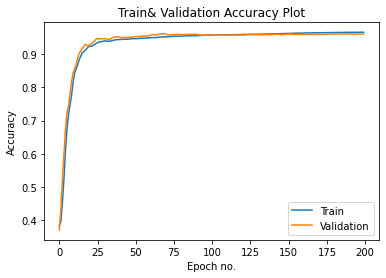

In [ ]:
train_accuracies = fbm_accuracies[:,1]
plt.plot(list(range(len(train_accuracies))),train_accuracies, label='Train')
val_accuracies = fbm_accuracies[:,0]
plt.plot(list(range(len(val_accuracies))),val_accuracies, label = 'Validation')
plt.title("Train& Validation Accuracy Plot")
plt.ylabel("Accuracy")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

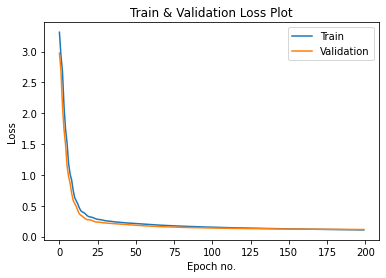

In [ ]:
train_losses = fbm_losses[:,1]
plt.plot(list(range(len(train_losses))),train_losses, label='Train')
val_losses = fbm_losses[:,0]
plt.plot(list(range(len(val_losses))),val_losses, label = 'Validation')
plt.title("Train & Validation Loss Plot")
plt.ylabel("Loss")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

Stochastic Gradient Descent without momentum

In [ ]:
def sgd(X, Y, h1, epochs, learning_rate):
    m = X.shape[1]
    accuracies = np.zeros((epochs,2))
    losses = np.zeros((epochs,2))
    parameters = initial_parameters(X.shape[0], h1, Y.shape[0])
    indexes = np.array([i for i in range(12000)])
    
    for i in range(epochs):
        np.random.shuffle(indexes)
        X_epoch = X_train[:, indexes]
        Y_epoch = Y_train[:, indexes]
        
        loss = 0
        acc = 0
        for k in range(X.shape[1]):
            X1 = X_epoch[:,k].reshape(784,1)
            Y1 = Y_epoch[:,k].reshape(1,1)
            
            y_pred, forward_pass = forward_prop(X1, parameters)
            
            loss += (1/m) * cost_loss(y_pred, Y1, parameters)
            
            acc += (1/m) * accuracy(threshold_func(y_pred), Y1) 
            
            gradients = back_prop(parameters, forward_pass, X1, Y1)
            parameters = gradient_descent(parameters, gradients, learning_rate)
            
        losses[i][1] = loss
        accuracies[i][1] = acc
        
        # validation accuracy per epoch
        y_pred_val, forward_pass = forward_prop(X_val, parameters)
        losses[i][0] = cost_loss(y_pred_val, Y_val, parameters)
        y_pred_mapped_val = threshold_func(y_pred_val)
        accuracies[i][0] = accuracy(Y_val, y_pred_mapped_val) # 0 for validation accuracy
        
        
        if i % 10 == 0:
            print('Epoch ',i,'==> Training loss: ', round(losses[i][1],4), '- Train accuracy: ', round(accuracies[i][1],4) , '- Validation loss: ', round(losses[i][0],4), '- Validation accuracy: ', round(accuracies[i][0],4))
        
    return losses, accuracies, parameters

In [ ]:
sgd_losses, sgd_accuracies, _ = sgd(X_train, Y_train, 100, 50, 0.001)

Epoch  0 ==> Training loss:  0.563 - Train accuracy:  0.7767 - Validation loss:  0.3419 - Validation accuracy:  0.86
Epoch  10 ==> Training loss:  0.1504 - Train accuracy:  0.95 - Validation loss:  0.1288 - Validation accuracy:  0.953
Epoch  20 ==> Training loss:  0.1217 - Train accuracy:  0.9604 - Validation loss:  0.1061 - Validation accuracy:  0.963
Epoch  30 ==> Training loss:  0.1073 - Train accuracy:  0.9656 - Validation loss:  0.0951 - Validation accuracy:  0.968
Epoch  40 ==> Training loss:  0.0975 - Train accuracy:  0.9693 - Validation loss:  0.088 - Validation accuracy:  0.971


In [ ]:
best_epoch = np.argmax(sgd_accuracies[:,0],axis = 0)
print('Epoch with max validation accuracy: ', best_epoch)
print('Validation accuracy at epoch', best_epoch,' =', sgd_accuracies[best_epoch][0])
print('Training accuracy at epoch', best_epoch,' =', sgd_accuracies[best_epoch][1])

Epoch with max validation accuracy:  46
Validation accuracy at epoch 46  = 0.974
Training accuracy at epoch 46  = 0.9709166666665764


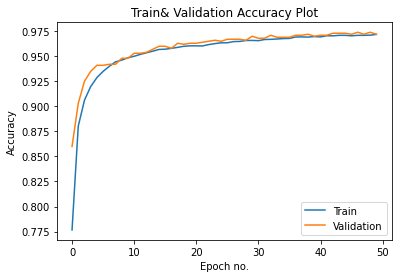

In [ ]:
train_accuracies = sgd_accuracies[:,1]
plt.plot(list(range(len(train_accuracies))),train_accuracies, label='Train')
val_accuracies = sgd_accuracies[:,0]
plt.plot(list(range(len(val_accuracies))),val_accuracies, label = 'Validation')
plt.title("Train& Validation Accuracy Plot")
plt.ylabel("Accuracy")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

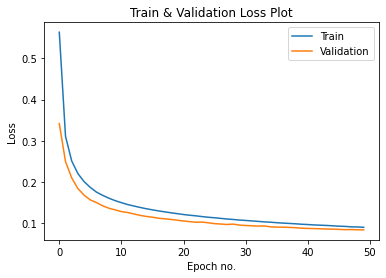

In [ ]:
train_losses = sgd_losses[:,1]
plt.plot(list(range(len(train_losses))),train_losses, label='Train')
val_losses = sgd_losses[:,0]
plt.plot(list(range(len(val_losses))),val_losses, label = 'Validation')
plt.title("Train & Validation Loss Plot")
plt.ylabel("Loss")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

Stochastic Gradient Descent with momentum

In [ ]:
# SGD with momentum
def sgd_momentum(X, Y, h1, epochs, learning_rate,momentum):
    m = X.shape[1]
    parameters, velocity = initial_parameters_mom(X.shape[0], h1, Y.shape[0])
    accuracies = np.zeros((epochs,2))
    losses = np.zeros((epochs,2))
    indexes = np.array([i for i in range(12000)])
    
    for i in range(epochs):
        np.random.shuffle(indexes)
        X_epoch = X_train[:, indexes]
        Y_epoch = Y_train[:, indexes]
        
        loss = 0
        acc = 0
        for k in range(X.shape[1]):
            X1 = X_epoch[:,k].reshape(784,1)
            Y1 = Y_epoch[:,k].reshape(1,1)
            
            y_pred, forward_pass = forward_prop(X1, parameters)
            
            loss += (1/m) * cost_loss(y_pred, Y1, parameters)
            
            acc += (1/m) * accuracy(threshold_func(y_pred), Y1) 
            
            gradients = back_prop(parameters, forward_pass, X1, Y1)
            parameters, velocity = gradient_descent_momentum(parameters, gradients, learning_rate, momentum, velocity)
            
        losses[i][1] = loss
        accuracies[i][1] = acc
        
        # validation accuracy per epoch
        y_pred_val, forward_pass = forward_prop(X_val, parameters)
        losses[i][0] = cost_loss(y_pred_val, Y_val, parameters)
        y_pred_mapped_val = threshold_func(y_pred_val)
        accuracies[i][0] = accuracy(Y_val, y_pred_mapped_val) # 0 for validation accuracy
        
        if i % 10 == 0:
            print('Epoch ',i,'==> Training loss: ', round(losses[i][1],4), '- Train accuracy: ', round(accuracies[i][1],4) , '- Validation loss: ', round(losses[i][0],4), '- Validation accuracy: ', round(accuracies[i][0],4))
        
    return losses, accuracies, parameters

In [ ]:
sgdm_losses, sgdm_accuracies, _ = sgd_momentum(X_train, Y_train, 100, 50, 0.001, 0.7)

Epoch  0 ==> Training loss:  0.324 - Train accuracy:  0.8809 - Validation loss:  0.1959 - Validation accuracy:  0.933
Epoch  10 ==> Training loss:  0.105 - Train accuracy:  0.9657 - Validation loss:  0.1057 - Validation accuracy:  0.962
Epoch  20 ==> Training loss:  0.0826 - Train accuracy:  0.9721 - Validation loss:  0.0907 - Validation accuracy:  0.969
Epoch  30 ==> Training loss:  0.0688 - Train accuracy:  0.9778 - Validation loss:  0.0844 - Validation accuracy:  0.969
Epoch  40 ==> Training loss:  0.0581 - Train accuracy:  0.9813 - Validation loss:  0.0816 - Validation accuracy:  0.971


In [ ]:
best_epoch = np.argmax(sgdm_accuracies[:,0],axis=0)
print('Epoch with max validation accuracy: ', best_epoch)
print('Validation accuracy at epoch', best_epoch,' =', sgdm_accuracies[best_epoch][0])
print('Training accuracy at epoch', best_epoch,' =', sgdm_accuracies[best_epoch][1])

Epoch with max validation accuracy:  45
Validation accuracy at epoch 45  = 0.973
Training accuracy at epoch 45  = 0.9824999999999084


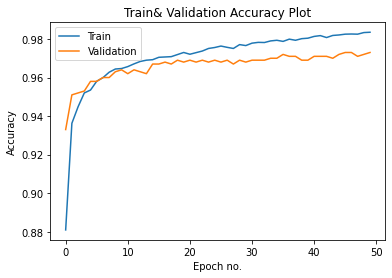

In [ ]:
train_accuracies = sgdm_accuracies[:,1]
plt.plot(list(range(len(train_accuracies))),train_accuracies, label='Train')
val_accuracies = sgdm_accuracies[:,0]
plt.plot(list(range(len(val_accuracies))),val_accuracies, label = 'Validation')
plt.title("Train& Validation Accuracy Plot")
plt.ylabel("Accuracy")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

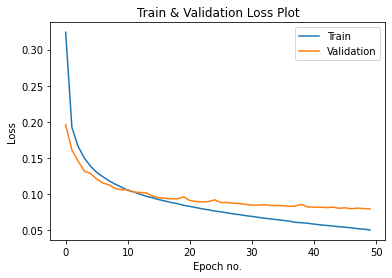

In [ ]:
train_losses = sgdm_losses[:,1]
plt.plot(list(range(len(train_losses))),train_losses, label='Train')
val_losses = sgdm_losses[:,0]
plt.plot(list(range(len(val_losses))),val_losses, label = 'Validation')
plt.title("Train & Validation Loss Plot")
plt.ylabel("Loss")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

Mini-batch Gradient Descent without momentum

In [ ]:
#helper functions for mini batch
def mini_batches_split(X, Y, batch_size):
    minibatches = []

    indexes = np.array([i for i in range(12000)])
    np.random.shuffle(indexes)
    X_epoch = X[indexes, :]
    Y_epoch = Y[indexes, :]

    for i in range(0, X_epoch.shape[0], batch_size):
        X_mini = X_epoch[i:i + batch_size]
        Y_mini = Y_epoch[i:i + batch_size]

        minibatches.append((X_mini, Y_mini))

    return minibatches

In [ ]:
def mini_batch(X, Y, h1, epochs, learning_rate, batch_size):
    
    parameters = initial_parameters(X.shape[0], h1, Y.shape[0])
    accuracies = np.zeros((epochs,2))
    losses = np.zeros((epochs,2))
    for i in range(epochs):
        loss = 0
        acc = 0
        mini_batches = mini_batches_split(X.T, Y.T, batch_size)
        no_of_batches = len(mini_batches)
        for m in mini_batches:
            X_mini, Y_mini = m
            X_mini = X_mini.T
            Y_mini = Y_mini.T
            m_sample = X_mini.shape[1]

            y_pred, forward_pass = forward_prop(X_mini, parameters)
            loss += (1/no_of_batches) * cost_loss(y_pred, Y_mini, parameters)
            acc += (1/no_of_batches) * accuracy(threshold_func(y_pred), Y_mini) 

            gradients = back_prop(parameters, forward_pass, X_mini, Y_mini)
            parameters = gradient_descent(parameters, gradients, learning_rate)

            
        losses[i][1] = loss
        accuracies[i][1] = acc
        
        # validation accuracy per epoch
        y_pred_val, forward_pass = forward_prop(X_val, parameters)
        losses[i][0] = cost_loss(y_pred_val, Y_val, parameters)
        y_pred_mapped_val = threshold_func(y_pred_val)
        accuracies[i][0] = accuracy(Y_val, y_pred_mapped_val) # 0 for validation accuracy
        
        if i % 10 == 0:
            print('Epoch ',i,'==> Training loss: ', round(losses[i][1],4), '- Train accuracy: ', round(accuracies[i][1],4) , '- Validation loss: ', round(losses[i][0],4), '- Validation accuracy: ', round(accuracies[i][0],4))
    
    return losses, accuracies, parameters
    

In [ ]:
mb_losses, mb_accuracies, _ = mini_batch(X_train, Y_train, 100, 50, 0.05, 64)

Epoch  0 ==> Training loss:  0.6372 - Train accuracy:  0.7742 - Validation loss:  0.3948 - Validation accuracy:  0.855
Epoch  10 ==> Training loss:  0.1579 - Train accuracy:  0.9417 - Validation loss:  0.1642 - Validation accuracy:  0.939
Epoch  20 ==> Training loss:  0.1268 - Train accuracy:  0.9558 - Validation loss:  0.1386 - Validation accuracy:  0.952
Epoch  30 ==> Training loss:  0.1101 - Train accuracy:  0.9611 - Validation loss:  0.1256 - Validation accuracy:  0.956
Epoch  40 ==> Training loss:  0.1 - Train accuracy:  0.9652 - Validation loss:  0.1168 - Validation accuracy:  0.957


In [ ]:
best_epoch = np.argmax(mb_accuracies[:,0],axis=0)
print('Epoch with max validation accuracy: ', best_epoch)
print('Validation accuracy at epoch', best_epoch,' =', mb_accuracies[best_epoch][0])
print('Training accuracy at epoch', best_epoch,' =', mb_accuracies[best_epoch][1])

Epoch with max validation accuracy:  44
Validation accuracy at epoch 44  = 0.96
Training accuracy at epoch 44  = 0.9665890957446809


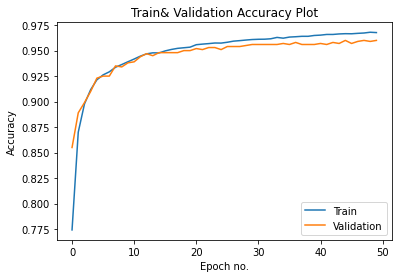

In [ ]:
train_accuracies = mb_accuracies[:,1]
plt.plot(list(range(len(train_accuracies))),train_accuracies, label='Train')
val_accuracies = mb_accuracies[:,0]
plt.plot(list(range(len(val_accuracies))),val_accuracies, label = 'Validation')
plt.title("Train& Validation Accuracy Plot")
plt.ylabel("Accuracy")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

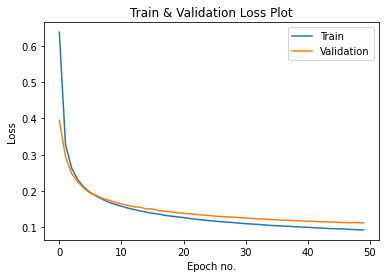

In [ ]:
train_losses = mb_losses[:,1]
plt.plot(list(range(len(train_losses))),train_losses, label='Train')
val_losses = mb_losses[:,0]
plt.plot(list(range(len(val_losses))),val_losses, label = 'Validation')
plt.title("Train & Validation Loss Plot")
plt.ylabel("Loss")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

Mini-batch Gradient Descent with momentum

In [ ]:
def mini_batch_momentum(X, Y, h1, epochs, learning_rate, momentum, batch_size):
    
    parameters, velocity = initial_parameters_mom(X.shape[0], h1, Y.shape[0])
    accuracies = np.zeros((epochs,2))
    losses = np.zeros((epochs,2))

    for i in range(epochs):
        loss = 0
        acc = 0
        mini_batches = mini_batches_split(X.T, Y.T, 64)
        no_of_batches = len(mini_batches)
        for m in mini_batches:
            X_mini, Y_mini = m
            X_mini = X_mini.T
            Y_mini = Y_mini.T
            m_sample = X_mini.shape[1]

            y_pred, forward_pass = forward_prop(X_mini, parameters)
            loss += (1/no_of_batches) * cost_loss(y_pred, Y_mini, parameters)
            acc += (1/no_of_batches) * accuracy(threshold_func(y_pred), Y_mini) 

            gradients = back_prop(parameters, forward_pass, X_mini, Y_mini)
            parameters, velocity = gradient_descent_momentum(parameters, gradients, learning_rate, momentum, velocity)
            
        losses[i][1] = loss
        accuracies[i][1] = acc
        
        # validation accuracy per epoch
        y_pred_val, forward_pass = forward_prop(X_val, parameters)
        losses[i][0] = cost_loss(y_pred_val, Y_val, parameters)
        y_pred_mapped_val = threshold_func(y_pred_val)
        accuracies[i][0] = accuracy(Y_val, y_pred_mapped_val) # 0 for validation accuracy
        
        if i % 10 == 0:
            print('Epoch ',i,'==> Training loss: ', round(losses[i][1],4), '- Train accuracy: ', round(accuracies[i][1],4) , '- Validation loss: ', round(losses[i][0],4), '- Validation accuracy: ', round(accuracies[i][0],4))

    
    return losses, accuracies , parameters  

In [ ]:
mbm_losses, mbm_accuracies, _ = mini_batch_momentum(X_train, Y_train, 100, 50, 0.05, 0.8, 64)

Epoch  0 ==> Training loss:  0.4368 - Train accuracy:  0.8656 - Validation loss:  0.1903 - Validation accuracy:  0.922
Epoch  10 ==> Training loss:  0.0914 - Train accuracy:  0.9704 - Validation loss:  0.1001 - Validation accuracy:  0.965
Epoch  20 ==> Training loss:  0.0709 - Train accuracy:  0.9753 - Validation loss:  0.0889 - Validation accuracy:  0.971
Epoch  30 ==> Training loss:  0.0575 - Train accuracy:  0.9802 - Validation loss:  0.0856 - Validation accuracy:  0.973
Epoch  40 ==> Training loss:  0.0479 - Train accuracy:  0.984 - Validation loss:  0.0823 - Validation accuracy:  0.974


In [ ]:
best_epoch = np.argmax(mbm_accuracies[:,0],axis=0)
print('Epoch with max validation accuracy: ', best_epoch)
print('Validation accuracy at epoch', best_epoch,' =', mbm_accuracies[best_epoch][0])
print('Training accuracy at epoch', best_epoch,' =', mbm_accuracies[best_epoch][1])

Epoch with max validation accuracy:  37
Validation accuracy at epoch 37  = 0.977
Training accuracy at epoch 37  = 0.9822140957446809


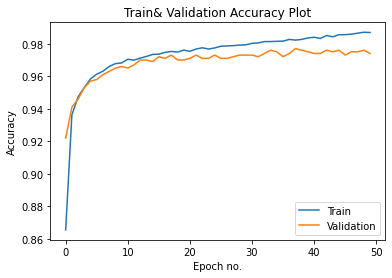

In [ ]:
train_accuracies = mbm_accuracies[:,1]
plt.plot(list(range(len(train_accuracies))),train_accuracies, label='Train')
val_accuracies = mbm_accuracies[:,0]
plt.plot(list(range(len(val_accuracies))),val_accuracies, label = 'Validation')
plt.title("Train& Validation Accuracy Plot")
plt.ylabel("Accuracy")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

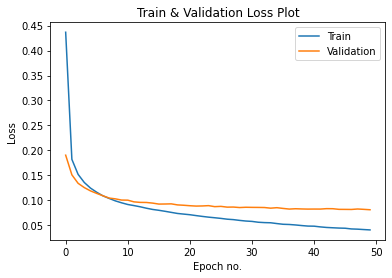

In [ ]:
train_losses = mbm_losses[:,1]
plt.plot(list(range(len(train_losses))),train_losses, label='Train')
val_losses = mbm_losses[:,0]
plt.plot(list(range(len(val_losses))),val_losses, label = 'Validation')
plt.title("Train & Validation Loss Plot")
plt.ylabel("Loss")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

Hyperparameter tuning

In [ ]:
# Hyperparameter search code for minibatch gradient descent

batch_sizes = [64,128,256]
learning_rate_range = [0.001, 0.005, 0.01, 0.05, 0.1]
momentum_range = [0.7,0.8,0.9]
losses = np.zeros((len(learning_rate_range),len(batch_sizes),len(momentum_range)))

for lr in range(len(learning_rate_range)):
    for b in range(len(batch_sizes)):
        for m in range(len(momentum_range)):
            _ , _ , parameters = mini_batch_momentum(X_train, Y_train, 100, 50, learning_rate_range[lr], momentum_range[m], batch_sizes[b])
            y_pred_val, _ = forward_prop(X_val, parameters)
            losses[lr][b][m] = cost_loss(y_pred_val, Y_val, parameters)
            

3.5 Model shootout

In [ ]:
X = X_train.reshape(784,12000)
Y = Y_train.reshape(1,12000)

In [ ]:
def cost_loss(y_pred, y_true):
    m = y_true.shape[1]
    cost = (1/m)*np.sum(((y_pred - y_true)**2)/2)
    return cost

def accuracy(y_true, y_pred):
    sim = 0
    for k in range(y_true.shape[1]):
        if y_true[0][k] == y_pred[0][k]:
            sim += 1

    return (sim/y_true.shape[1])

In [ ]:
# vanilla perceptron training
epochs = 100
weights = np.zeros(X.shape[0]).reshape(1,-1)
biases = 0
accuracies = np.zeros((epochs,2))
losses = np.zeros((epochs,2))
training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []

for i in range(epochs):
    for j in range(X.shape[1]):
        X1 = X[:,j].reshape(784,1)
        y_hat = weights @ X1 + biases
        if y_hat < 0 and Y[:,j] == 1:
            weights = weights + X1.T
            biases = biases
        elif y_hat >= 0 and Y[:,j] == 0:
            weights = weights - X1.T
            biases = biases
            
    pred_train = []
    for k in range(Y_train.shape[1]):
        y_pred = weights @ X_train[:,k] + biases
        if y_pred >= 0:
            pred_train.append(1)
        else:
            pred_train.append(0)

    preds = np.array(pred_train).reshape(1,12000)
    training_accuracy.append(accuracy(Y_train, preds))
    training_loss.append(cost_loss(preds,Y_train))

    pred_val = []
    c = 0
    for l in range(Y_val.shape[1]):
        y_pred = weights @ X_val[:,l] + biases
        if y_pred >= 0:
            pred_val.append(1)
        else:
            pred_val.append(0)
        
    preds = np.array(pred_val).reshape(1,1000)
    validation_accuracy.append(accuracy(Y_val, preds))
    validation_loss.append(cost_loss(preds,Y_val))
    
    

In [ ]:
best_epoch = len(validation_accuracy) - np.argmax(validation_accuracy[::-1]) - 1
print('Training accuracy => ', training_accuracy[best_epoch])
print('Validation accuracy =>',validation_accuracy[best_epoch])

Training accuracy =>  0.9689166666666666
Validation accuracy => 0.976


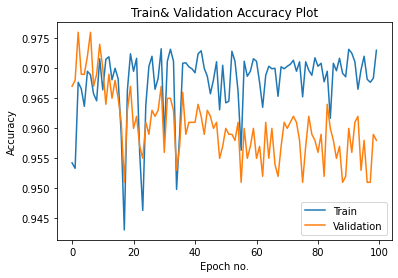

In [ ]:
plt.plot(list(range(len(training_accuracy))),training_accuracy, label='Train')
plt.plot(list(range(len(validation_accuracy))),validation_accuracy, label = 'Validation')
plt.title("Train& Validation Accuracy Plot")
plt.ylabel("Accuracy")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

In [ ]:
#vanilla perceptron prediction - validation accuracy
pred_val = []
for i in range(Y_val.shape[1]):
    y_pred = weights @ X_val[:,i] + biases
    if y_pred >= 0:
        pred_val.append(1)
    else:
        pred_val.append(0)
        
preds = np.array(pred_val).reshape(1,1000)

print('Validation Accuracy: ', accuracy(Y_val, preds) * 100, '%')

Validation Accuracy:  95.8 %


In [ ]:
#vanilla perceptron prediction - train accuracy
pred_train = []
for i in range(Y_train.shape[1]):
    y_pred = weights @ X_train[:,i] + biases
    if y_pred >= 0:
        pred_train.append(1)
    else:
        pred_train.append(0)
        
preds = np.array(pred_train).reshape(1,12000)
accuracy(Y_train, preds)

print('Train Accuracy: ', accuracy(Y_train, preds) * 100, '%')

Train Accuracy:  97.3 %


In [ ]:
def mini_batch_momentum(X, Y, h1, epochs, learning_rate, momentum, batch_size):
    
    parameters, velocity = initial_parameters_mom(X.shape[0], h1, Y.shape[0])
    accuracies = np.zeros((epochs,2))
    losses = np.zeros((epochs,2))

    for i in range(epochs):
        loss = 0
        acc = 0
        mini_batches = mini_batches_split(X.T, Y.T, 64)
        no_of_batches = len(mini_batches)
        for m in mini_batches:
            X_mini, Y_mini = m
            X_mini = X_mini.T
            Y_mini = Y_mini.T
            m_sample = X_mini.shape[1]

            y_pred, forward_pass = forward_prop(X_mini, parameters)
            loss += (1/no_of_batches) * cost_loss(y_pred, Y_mini, parameters)
            acc += (1/no_of_batches) * accuracy(threshold_func(y_pred), Y_mini) 

            gradients = back_prop(parameters, forward_pass, X_mini, Y_mini)
            parameters, velocity = gradient_descent_momentum(parameters, gradients, learning_rate, momentum, velocity)
            
        losses[i][1] = loss
        accuracies[i][1] = acc
        
        # validation accuracy per epoch
        y_pred_val, forward_pass = forward_prop(X_val, parameters)
        losses[i][0] = cost_loss(y_pred_val, Y_val, parameters)
        y_pred_mapped_val = threshold_func(y_pred_val)
        accuracies[i][0] = accuracy(Y_val, y_pred_mapped_val) # 0 for validation accuracy
        
        if i % 10 == 0:
            print('Epoch ',i,'==> Training loss: ', round(losses[i][1],4), '- Train accuracy: ', round(accuracies[i][1],4) , '- Validation loss: ', round(losses[i][0],4), '- Validation accuracy: ', round(accuracies[i][0],4))

    
    return losses, accuracies , parameters  

In [ ]:
mbm_losses, mbm_accuracies, _ = mini_batch_momentum(X_train, Y_train, 100, 50, 0.05, 0.8, 64)

Epoch  0 ==> Training loss:  0.3771 - Train accuracy:  0.8676 - Validation loss:  0.1796 - Validation accuracy:  0.934
Epoch  10 ==> Training loss:  0.0917 - Train accuracy:  0.9683 - Validation loss:  0.1045 - Validation accuracy:  0.96
Epoch  20 ==> Training loss:  0.0688 - Train accuracy:  0.9767 - Validation loss:  0.0885 - Validation accuracy:  0.972
Epoch  30 ==> Training loss:  0.0554 - Train accuracy:  0.9826 - Validation loss:  0.0835 - Validation accuracy:  0.971
Epoch  40 ==> Training loss:  0.0459 - Train accuracy:  0.9855 - Validation loss:  0.0811 - Validation accuracy:  0.973


In [ ]:
best_epoch = np.argmax(mbm_accuracies[:,0],axis=0)
print('Epoch with max validation accuracy: ', best_epoch)
print('Validation accuracy at epoch', best_epoch,' =', mbm_accuracies[best_epoch][0])
print('Training accuracy at epoch', best_epoch,' =', mbm_accuracies[best_epoch][1])

Epoch with max validation accuracy:  49
Validation accuracy at epoch 49  = 0.978
Training accuracy at epoch 49  = 0.9872839095744691


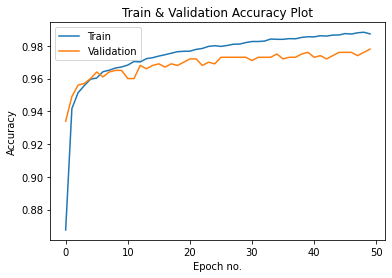

In [ ]:
train_accuracies = mbm_accuracies[:,1]
plt.plot(list(range(len(train_accuracies))),train_accuracies, label='Train')
val_accuracies = mbm_accuracies[:,0]
plt.plot(list(range(len(val_accuracies))),val_accuracies, label = 'Validation')
plt.title("Train & Validation Accuracy Plot")
plt.ylabel("Accuracy")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()

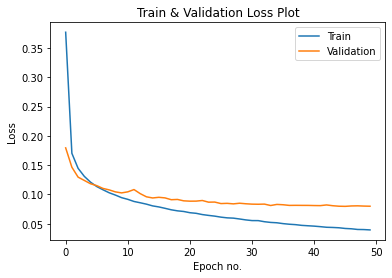

In [ ]:
train_losses = mbm_losses[:,1]
plt.plot(list(range(len(train_losses))),train_losses, label='Train')
val_losses = mbm_losses[:,0]
plt.plot(list(range(len(val_losses))),val_losses, label = 'Validation')
plt.title("Train & Validation Loss Plot")
plt.ylabel("Loss")
plt.xlabel("Epoch no.")
plt.legend()
plt.show()